This notebook contains statements and solutions to several problems from https://hackerrank.com.

<a id = 'TC'></a>
<h1>Table of Contents</h1>
1. [Utility Functions](#utility_functions)
2. Problems
    - [Weighted Dijkstra](#weighted_dijkstra)
    - [Repetitive K-Sums](#repetitive_k_sums)
    

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx

<a id = 'utility_functions'></a>

<h2> Utility Functions  [$\uparrow$](#TC) </h2>

In [2]:
def draw_weighted_graph(n, edges, node_labels = None):
    
    if node_labels: labels = dict([(i, 'v'+str(i) +'\n'+str(node_labels[i-1])  ) for i in range(1,n+1)])
    else: labels = None
        
    G = nx.Graph()
    for i in range(1, n+1): G.add_node(i)
    for edge in edges: G.add_edge(edge[0], edge[1],weight = edge[2])
    pos = nx.shell_layout(G)
    nx.draw_networkx(G, pos = pos, node_size = 1000, labels = labels)
    for edge in edges:
        a = edge[0]
        b = edge[1]
        w = edge[2]
        H = nx.Graph()
        H.add_node(w)
        pos_H = {w: [(pos[a][0] + pos[b][0])/2 , (pos[a][1] + pos[b][1])/2 ]}
        nx.draw_networkx(H,pos = pos_H, node_color = 'w', node_shape = '8')
    plt.axis('off')
    plt.show()


<a id = 'weighted_dijkstra'></a>

<h2> Dijkstra: Shortest Reach 2  [$\uparrow$](#TC) </h2>

This problem could be found at https://www.hackerrank.com/challenges/dijkstrashortreach/problem

To submit the code paste the body of the dijkstra function into the function provided on the website.

**Problem Statement:** Given an undirected graph and a starting node, determine the lengths of the shortest paths from the starting node to all other nodes in the graph. If a node is unreachable, its distance is -1. Nodes will be numbered consecutively from 1 to $n$, and edges will have varying distances or lengths.

**Input Format:**
Each test case is as follows: 
- The first line contains two space-separated integers $n$ and $m$, the number of nodes and edges in the graph. 
- Each of the next $m$ lines contains three space-separated integers $x$,$y$ , and $r$ , the beginning and ending nodes of an edge, and the length of the edge. 
- The last line of each test case has an integer $s$, denoting the starting position.

In [3]:
def dijkstra(n,edges,s):
    inf = 10**10
    # Weight matrix
    W = []
    for i in range(n): W.append([inf]*n)
    
    for edge in edges:
        x = edge[0] - 1
        y = edge[1] - 1 
        r = edge[2]
        if r < W[x][y]:
            W[x][y] = r
            W[y][x] = r
    
    finilized = [False]*n
    dist = [inf]*n
    dist[s-1] = 0
    
    while True:

        next_closest = -1
        next_closest_dist = inf
        for vertex in range(n):
            if not finilized[vertex] and dist[vertex] < next_closest_dist:
                next_closest = vertex
                next_closest_dist = dist[vertex]

        if next_closest == -1:
            for i in range(n):
                if dist[i] >= inf: dist[i] = -1
        # uncomment next line for the hackerrank submission
        #    dist.pop(s-1) 
            return(dist)
        
        finilized[next_closest] = True
        for vertex in range(n):
            if dist[vertex] > dist[next_closest] + W[next_closest][vertex]:
                dist[vertex] = dist[next_closest] + W[next_closest][vertex]
        
    

To test the code above we will generate a random graph, compute shortest paths to the first vertex  and visually check the correctness of the computed shortest distances. Note that we don't check the multiedge condition. In the following testing function the argument $n$ is the number of nodes. Recommended values 3 - 10.

In [8]:
def test_dijkstra(n):
    edges = []
    for i in range(1, n+1):
        for j in range(1,n+1):
            if i != j and np.random.binomial(n = 1, p = 1/n): edges.append((i,j,np.random.randint(1,10)))
    #s = np.random.randint(0,n+1)
    draw_weighted_graph(n,edges, dijkstra(n,edges,1))
    

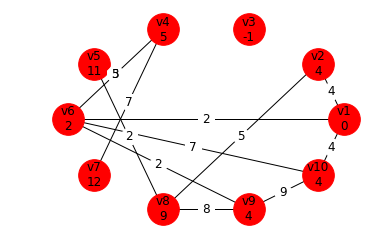

In [9]:
test_dijkstra(10)

<a id = 'repetitive_k_sums'></a>

<h2> Repetitive K-Sums  [$\uparrow$](#TC) </h2>

This problem could be found at https://www.hackerrank.com/challenges/repeat-k-sums/problem

Alice thinks of a non-decreasing sequence of non-negative integers and wants Bob to guess it by providing him the set of all its $K$-sums with repetitions.

What is this? Let the sequence be $\{A_1, A_2, ..., A_N\}$ and K be some positive integer that both Alice and Bob know. Alice gives Bob the set of all possible values that can be genereated by this - $A_{i_1} + A_{i_2} + ... + A_{i_K}$, where $1 \leq i_1 \leq i_2 \leq \ldots \leq i_K \leq N$. She can provide the values generated in any order she wishes to. Bob's task is to restore the initial sequence.

Consider an example. Let $N = 3$ and $K = 2$. The sequence is $\{A_1,A_2,A_3\}$. The sequence of its 2-sums with repetitions is $\{A_1 + A_1, A_1 + A_2, A_1 + A_3, A_2 + A_2, A_2 + A_3, A_3 + A_3\}$. But its elements could be provided in any order. For example any permutation of $\{2, 3, 4, 4, 5, 6\}$ corresponds to the sequence $\{1, 2, 3\}$.

**Input Format**

The first line of the input contains an integer $T$ denoting the number of test cases. 
The description of $T$ test cases follows. 
The first line of each test case contains two space separated integers $N$ and $K$. 

The second line contains the sequence $S_i$ of all $K$-sums with repetitions of the sequence Alice initially thought of.

**Constrains**

- $1 \leq  T,N \leq 10^5$
- $1 \leq  K \leq 10^9$
- $2 \leq  S_i \leq 10^{18}$

**Note **

The total number of elements in any input sequence does not exceed $10^5$.
Each element of each input sequence is non-negative integer not exceeding $10^{18}$. 
Each input sequence is a correct sequence of all $K$-sums with repetitions of some non-decreasing sequence of non-negative integers.

**Output Format**

For each test case, output a single line containing the space separated list of elements of the non-decreasing sequence Alice thinks of. If there are several possible outputs you can output any of them.

In [10]:
def repetitive_sums(n, K, S):
    S.sort()
    
    if n == 1:
        return([S[0]//K])
    if n == 2:
        return( [S[0]//K, S[len(S)-1]//K])
    if n == 3:
        return([S[0]//K, S[1] - (S[0]//K)*(K-1) ,S[len(S)-1]//K])
    if n == 4:
        ans0 = S[0]//K
        ans1 = S[1] - ans0*(K-1)
        ans3 = S[len(S)-1]//K
        ans2 = S[len(S)-2] - (K-1)*ans3
        return([ans0, ans1, ans2, ans3])
    
    # We will find elements of the sequence one by one and generate current repetitive sums
    # The first element in A is
    ans = [S[0]//K] 
    
    sums = []
    for k in range(K+1):
        sums.append([k*ans[0]])

    
    for m  in range(1,n):
        i = 0
        while i < len(sums[K]) and S[i] == sums[K][i]: i += 1

        ans.append(S[i] - (K-1)*ans[0])
        
        new_sums = []
        new_sums.append([0])
        
        for k in range(1,K+1): # count sums of k elements from the first m number for k = 1..K
            tmp_sums = sums[:k+1]
            for l in range(1,k+1):
                tmp_sums[k-l] = [x+y for x,y in zip(sums[k-l], [ans[m]*l]*len(sums[k-l]))]
            
            # take union of tmp_sums[0..k] --> new_sums[k]
            tmp = []
            for l in range(0,k+1):
                tmp.extend(tmp_sums[l])
            new_sums.append(sorted(tmp))

        sums = new_sums[:]
        
    return(ans)


Now we test the above function by taking a random sequence $A$, generating sums and recovering $A$ back.

In [11]:
def generate_sums(A,K):
        sums = []
        def generator(sum_,level):
            if level == K: sums.append(sum_)
            else:
                for a in A: generator(sum_+a, level+1)
        generator(0,0)
        return(sums)
        

In [12]:
def test_repetitive_sums(n = 3, K = 10):
    A = np.random.randint(2,10,size = n)
    sums = generate_sums(A,K)
    A.sort()
    print("Generating sequence A:", *A)
    
    reconstructed = repetitive_sums(n,K,sums)
    print("Reconstructed sequence: ", *reconstructed)
    

In [13]:
test_repetitive_sums(4,10)

Generating sequence A: 2 3 4 5
Reconstructed sequence:  2 3 4 5
